Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data

In [ ]:
df = pd.read_csv("/content/credit_card_defaulter.csv")

Checking the data

In [ ]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
df.loc[212]

Unnamed: 0            213
default                No
student                No
balance        853.161332
income        36272.45178
Name: 212, dtype: object

Check for emptiness and cleanse data

In [ ]:
df.isna().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

Plotting EDA graphs 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


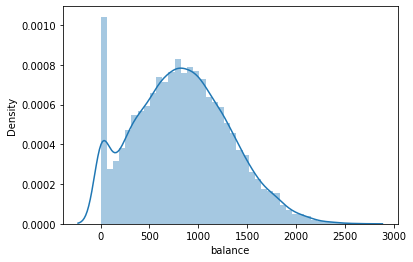

In [ ]:
sns.distplot(df['balance'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


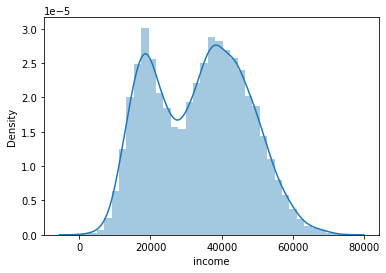

In [ ]:
sns.distplot(df['income'],hist=True)

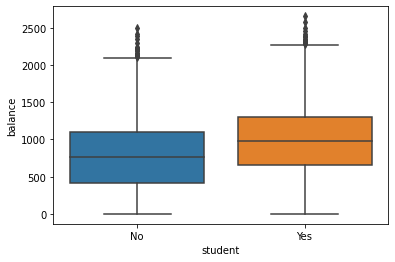

In [ ]:
sns.boxplot(data=df,x="student",y="balance")

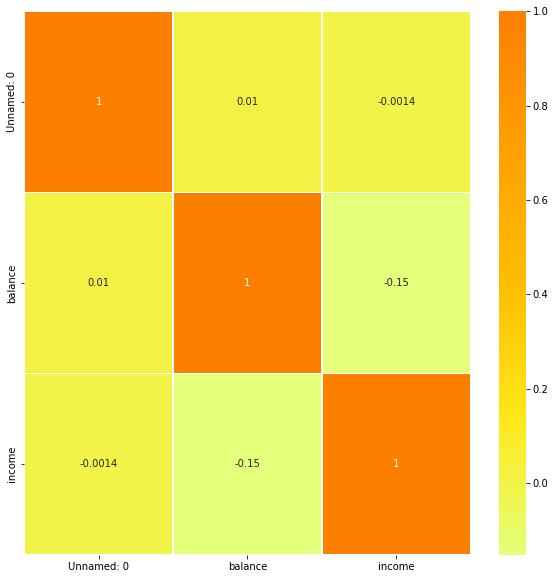

In [ ]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap='Wistia',annot=True,linewidths=.5);

Label Encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['default']= label_encoder.fit_transform(df['default'])

In [ ]:
df['student']= label_encoder.fit_transform(df['student'])

In [ ]:
df.head

<bound method NDFrame.head of       Unnamed: 0  default  student      balance       income
0              1        0        0   729.526495  44361.62507
1              2        0        1   817.180407  12106.13470
2              3        0        0  1073.549164  31767.13895
3              4        0        0   529.250605  35704.49394
4              5        0        0   785.655883  38463.49588
...          ...      ...      ...          ...          ...
9995        9996        0        0   711.555020  52992.37891
9996        9997        0        0   757.962918  19660.72177
9997        9998        0        0   845.411989  58636.15698
9998        9999        0        0  1569.009053  36669.11236
9999       10000        0        1   200.922183  16862.95232

[10000 rows x 5 columns]>

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split

Dependent and Independent variable

In [ ]:
X=df.drop("default", axis=1)
Y=df["default"]

In [ ]:
print(X)

      student      balance       income
0           0   729.526495  44361.62507
1           1   817.180407  12106.13470
2           0  1073.549164  31767.13895
3           0   529.250605  35704.49394
4           0   785.655883  38463.49588
...       ...          ...          ...
9995        0   711.555020  52992.37891
9996        0   757.962918  19660.72177
9997        0   845.411989  58636.15698
9998        0  1569.009053  36669.11236
9999        1   200.922183  16862.95232

[10000 rows x 3 columns]


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64


Spliting the training and Testing data

In [ ]:
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 20)

Printing the shape of training and Testing Data

In [ ]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (7500, 3), len 7500.
X_test shape (2500, 3), len 2500.
Y_train shape (7500,), len 7500.
Y_test shape (2500,), len 2500.


Random Forest Regression Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
reg_F = RandomForestClassifier(n_estimators = 10, random_state = 0)

Build a random forest regression Model

Train the model on the train dataset

In [ ]:
reg_F.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
pred_f=reg_F.predict(X_test)

Print the model summary

In [ ]:
df_RandomForest = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_f})
df_RandomForest.head()

,Actual,Predicted
9957,0,0
1687,0,0
2116,0,0
231,0,0
2780,0,0


In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
print(r2_score(y_true=Y_test, y_pred=pred_f))

0.022928608650338522


In [ ]:
pred_f

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
score_1 = r2_score(Y_test,pred_f)

print("r_square score --> ",score_1)

print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, pred_f))

print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, pred_f))

print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, pred_f)))

r_square score -->  0.022928608650338522
Mean Absolute Error --> 0.0288
Mean Squared Error --> 0.0288
Root Mean Squared Error --> 0.16970562748477142


In [ ]:
print("Accuracy Score: ",accuracy_score(Y_test,pred_f))
print("F1 Score: ", f1_score(Y_test,pred_f))
print("Confusion Matrix: \n", confusion_matrix(Y_test,pred_f))
print("\n")
print("Classification report: \n", classification_report(Y_test,pred_f))
print("ROC_AUC score: ",roc_auc_score(Y_test,pred_f))

Accuracy Score:  0.9712
F1 Score:  0.3898305084745763
Confusion Matrix: 
 [[2405   19]
 [  53   23]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2424
           1       0.55      0.30      0.39        76

    accuracy                           0.97      2500
   macro avg       0.76      0.65      0.69      2500
weighted avg       0.97      0.97      0.97      2500

ROC_AUC score:  0.6473966475594928


Model Evaluation:
Accuracy = 0.97. This means that, the model made 97% correct predictions out of the total predictions made by the model. However, accuracy is not a good metric in case of imbalance classes.

The confusion matrix says that: True Positive = 3171 False Positive = 74 True Negative = 29 False Negative = 26

F1 Score for non-defaulters = 98% F1 score for defaulters = 37% F1 score is the harmonic mean of precision and recall.

ROC Curve

In [ ]:
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(Y_test,pred_f)

Plotting ROC curve for Random Forest Model

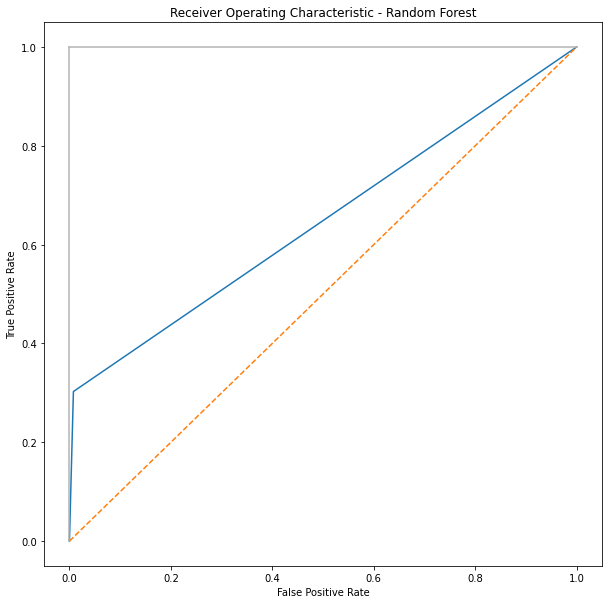

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost Classifier Model Building

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier()

In [ ]:
print(model)

XGBClassifier()


In [ ]:
xg_pred = model.predict(X_test)

Model Summary

In [ ]:
print("Accuracy Score: ",accuracy_score(Y_test,xg_pred))
print("F1 Score: ", f1_score(Y_test,xg_pred))
print("Confusion Matrix: \n", confusion_matrix(Y_test,xg_pred))
print("\n")
print("Classification report: \n", classification_report(Y_test,xg_pred))
print("ROC_AUC score: ",roc_auc_score(Y_test,xg_pred))

Accuracy Score:  0.9756
F1 Score:  0.45045045045045046
Confusion Matrix: 
 [[2414   10]
 [  51   25]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2424
           1       0.71      0.33      0.45        76

    accuracy                           0.98      2500
   macro avg       0.85      0.66      0.72      2500
weighted avg       0.97      0.98      0.97      2500

ROC_AUC score:  0.6624109779398993


Model Evaluation:
Accuracy = 0.98. This means that, the model made 98% correct predictions out of the total predictions made by the model. However, accuracy is not a good metric in case of imbalance classes.

The confusion matrix says that: True Positive = 3188 False Positive = 71 True Negative = 9 False Negative = 31

F1 Score for non-defaulters = 99% F1 score for defaulters = 44% F1 score is the harmonic mean of precision and recall.

ROC Curve

In [ ]:
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(Y_test,xg_pred)

Plotting ROC Curve

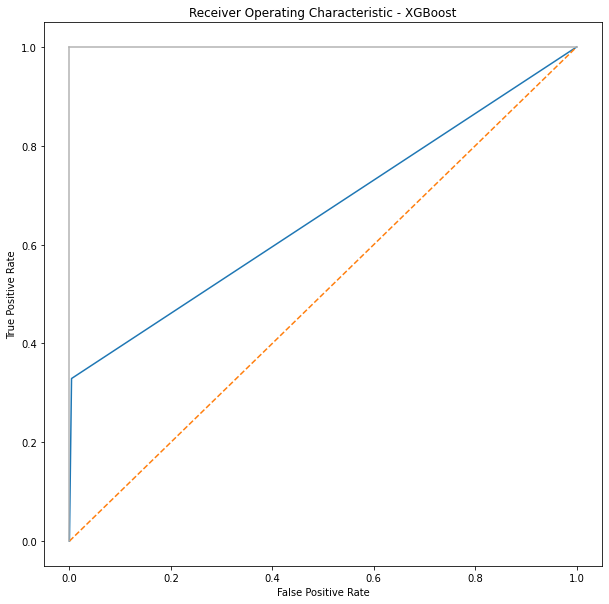

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Since the Area Under the ROC is higher for the XGBoost model, the XGBoost model is better for the classification task than Random Forest.

Higher Accuracy of the XGBoost method over the Random Forest also says that XGBoost is preferred, yet since the dataset is unbalanced, I do not base my conslusions on accuracy score.

Higher F1 score of XGBoost method also gives the same result as above.